## Problem Statement


*Context*
  
To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application. In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes.

*Objective:*
    
The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.

*Dataset:*

- Age (Numeric: Age in years)
- Sex (Categories: male, female)
- Job (Categories: unskilled and non-resident, unskilled and resident, skilled, highly skilled)
- Housing (Categories: own, rent, or free)
- Saving accounts (Categories: little, moderate, quite rich, rich)
- Checking account (Categories: little, moderate, rich)
- Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
- Duration (Numeric: Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))

## IMPORT LIBRABRIES

In [102]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import pickle

## READ DATASET

In [103]:
df0 = pd.read_csv("German_Credit.csv")
df = df0.copy()

In [104]:
df.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
19,31,male,skilled,own,quite rich,moderate,3430,24,0,radio/TV
176,42,male,skilled,own,little,little,2577,12,0,furniture/equipment
418,31,female,highly skilled,own,quite rich,moderate,2782,21,0,car
335,44,male,highly skilled,rent,little,little,3384,6,1,furniture/equipment
533,26,male,skilled,own,moderate,moderate,1311,24,0,radio/TV
859,26,male,skilled,rent,moderate,moderate,3577,9,0,car
680,56,female,skilled,own,little,little,1538,6,0,education
357,26,male,highly skilled,own,little,little,4463,36,1,radio/TV
495,20,male,skilled,own,little,little,2996,24,1,furniture/equipment
464,34,male,skilled,own,little,little,1950,18,0,business


- most age range in this data is between 20 to 45
- There are more males in this dataset than females
- There are more skilled persons in the job category
- Mos people own houses in this dataset
- Most people fall under the little category in thier savings account
- most people fall under the little category in thir checking account
- The highest duration for which credit is give is 48 months
- Most people in thiss dataset are not credit defaulters
- The purpose of requesting for loan for most people in this dataset is for radio/Tv

## DATA OVERVIEW

In [105]:
df.shape

(1000, 10)

- There are 1000 rows, and 10 columns in this dataset

In [106]:
df.dtypes

Age                  int64
Sex                 object
Job                 object
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Risk                 int64
Purpose             object
dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


- There are 4 integers, 6 objects and no float in this dataset


In [108]:
df.describe()

,Age,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000,0.300000
std,11.375469,2822.736876,12.058814,0.458487
min,19.000000,250.000000,4.000000,0.000000
25%,27.000000,1365.500000,12.000000,0.000000
50%,33.000000,2319.500000,18.000000,0.000000
75%,42.000000,3972.250000,24.000000,1.000000
max,75.000000,18424.000000,72.000000,1.000000


- The min age of people who request for loan is 19yrs and the maximum is 75 yrs and the average age of people who request for credit is 35.5 years. 50% of the people who request for loan is above 33 years and 50% is below 33 years
- The maximun credit amount request is 18424 dm while the minnimum is 250 dm
- 50% of people who request for credit requests above 2319 dm and 50% below 2319 dm
- 

In [109]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Risk                0
Purpose             0
dtype: int64

- There are no missing values in this dataset

In [110]:
df.duplicated().sum()

np.int64(0)

- There are no duplicates in this dataset

In [111]:
df.nunique()

Age                  53
Sex                   2
Job                   3
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Risk                  2
Purpose               8
dtype: int64

- There are 7 categorical variables in this dataset

## EXPLORATORY DATA ANALYSIS(EDA)

In [112]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

#### UNIVARIATE ANALYSIS

In [113]:
# Define function
def uni_continous(data, feature):
    sns.histplot(data=data,x=feature,kde=True)
    plt.xticks(rotation=90,ha=("right"))
    plt.show()
    sns.boxplot(data=data,x=feature)

def uni_categorical(data,feature):
    sns.countplot(data=data,x=feature, palette = 'Greys')
    plt.xticks(rotation=90,ha="right")

In [114]:
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
296,20,female,skilled,rent,little,moderate,4675,12,0,car


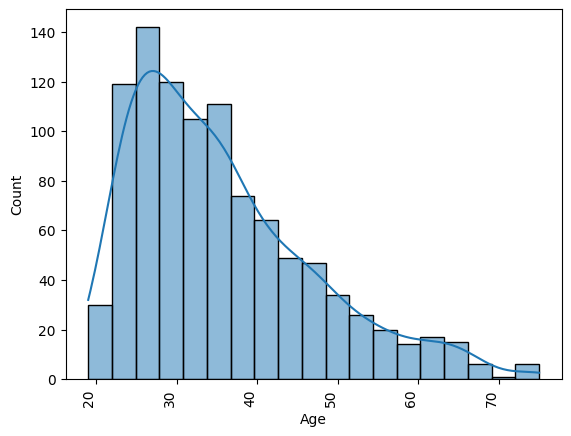

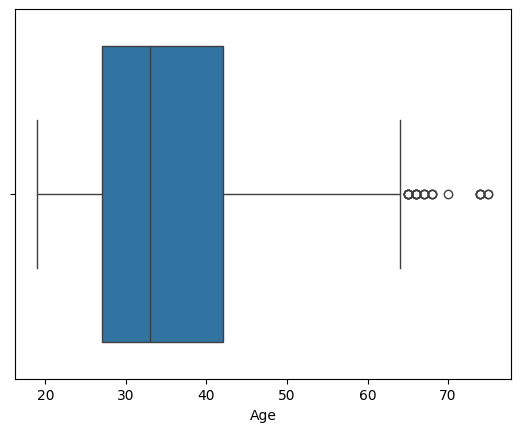

In [115]:
uni_continous(df,"Age")

- This is a rightly skwed data
- Most people that takes credit from the bank fall between 20 - 50 years of age
- There are outliersin this data

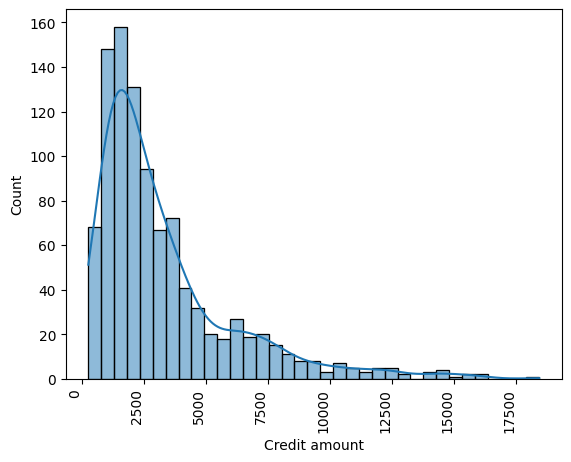

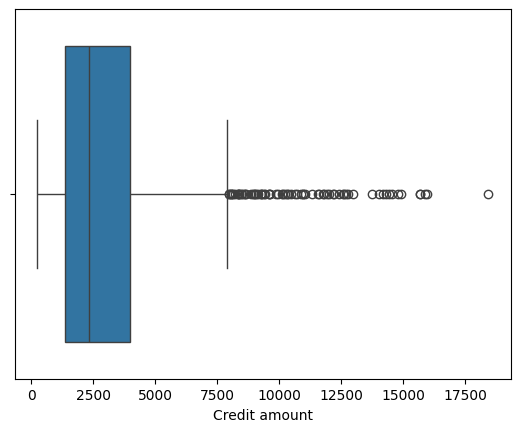

In [116]:
uni_continous(df,"Credit amount")

- This data is rightly skewed
- Most people request for credit between 1000 to 7500 DM
- There are outliers in this dataset

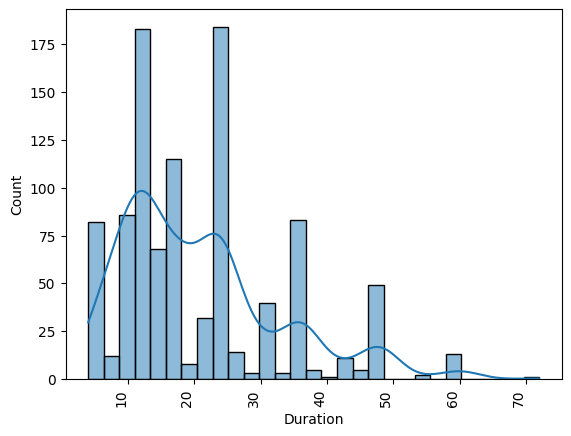

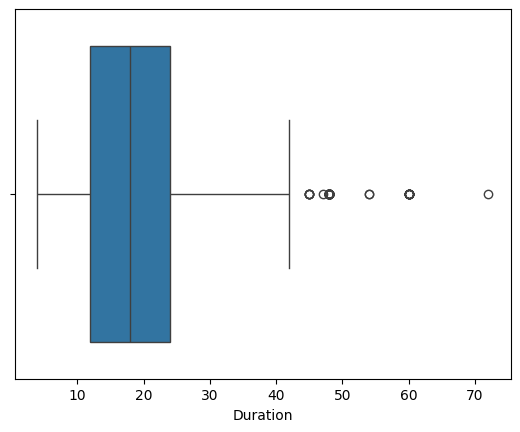

In [117]:
uni_continous(df,"Duration")

- This data is rightly skewed
- They ae outliers in the dataset
- Most credit duration is between 5 to 40 months

In [118]:
df["Duration"].value_counts()

Duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
7       5
45      5
39      5
13      4
14      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

In [119]:
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
475,26,female,skilled,rent,little,little,3114,18,1,furniture/equipment


C:\Users\USER\AppData\Local\Temp\ipykernel_12580\1974795252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


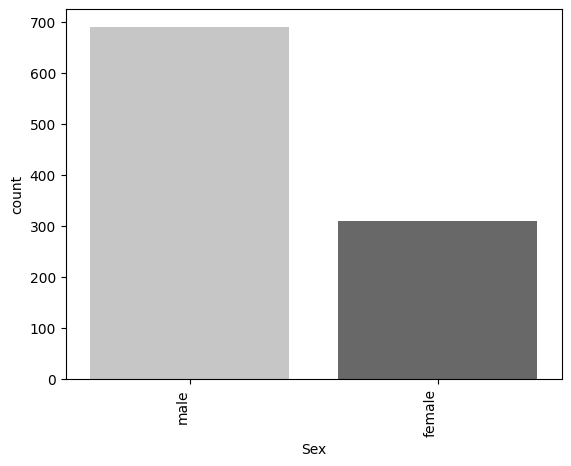

In [120]:
uni_categorical(df,"Sex")

- Most males request for credits than females

C:\Users\USER\AppData\Local\Temp\ipykernel_12580\1974795252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


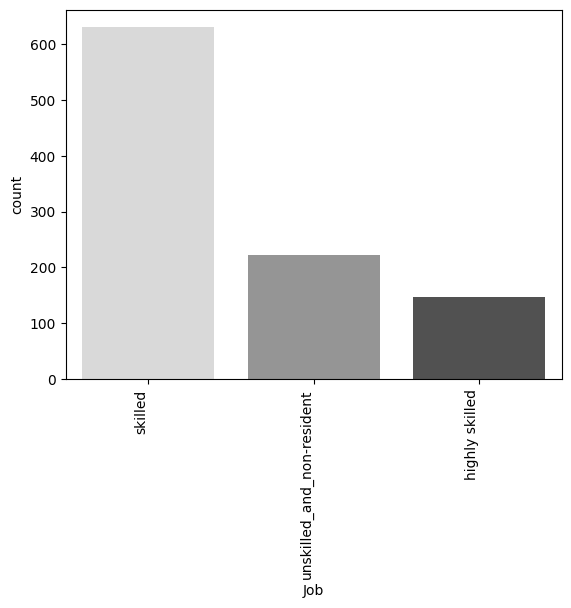

In [121]:
uni_categorical(df,"Job")

- Most people that request for credits are skilled people
- People who are highly skilled, equest for credit the least

C:\Users\USER\AppData\Local\Temp\ipykernel_12580\1974795252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


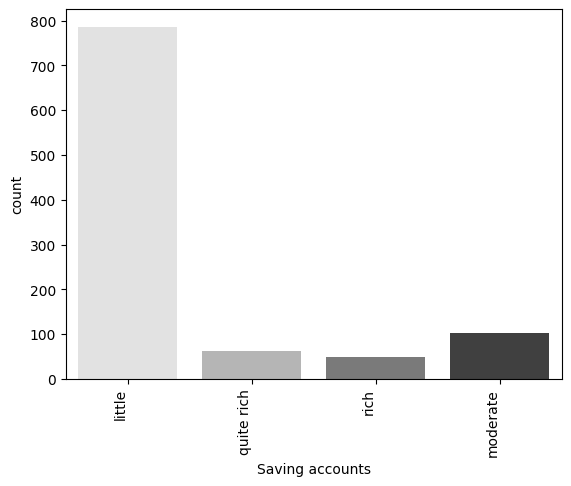

In [122]:
uni_categorical(df,"Saving accounts")

- People that fall under the little category of saving accounts, request for credits the most
- People who are rich and moderately rich, request for credit the least

C:\Users\USER\AppData\Local\Temp\ipykernel_12580\1974795252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


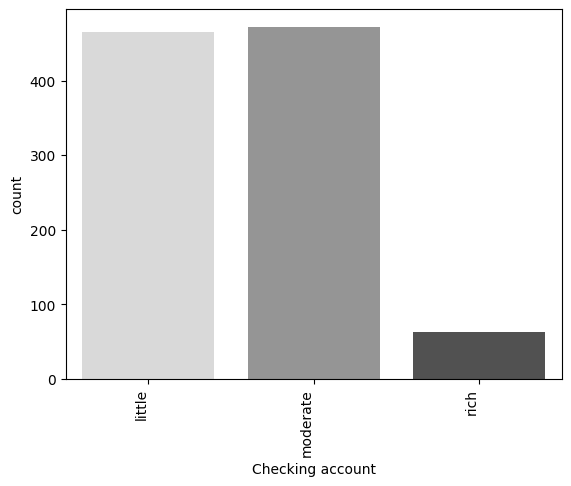

In [123]:
uni_categorical(df,"Checking account")

- People with little and moderate checking account, takes credit the most
- People with rich checking account rarely request for credits

C:\Users\USER\AppData\Local\Temp\ipykernel_12580\1974795252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


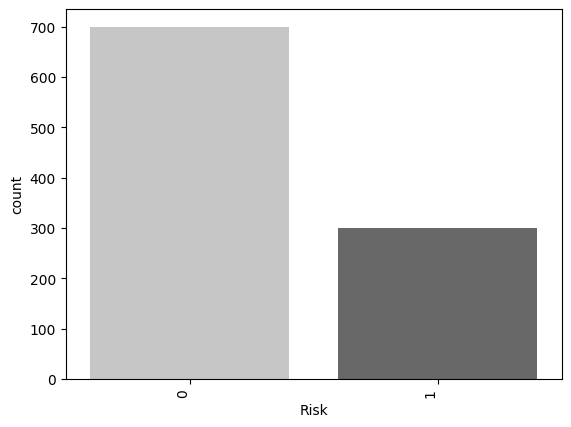

In [124]:
uni_categorical(df,"Risk")

- Most people that takes credits are not at risk of being credit defaulters

C:\Users\USER\AppData\Local\Temp\ipykernel_12580\1974795252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


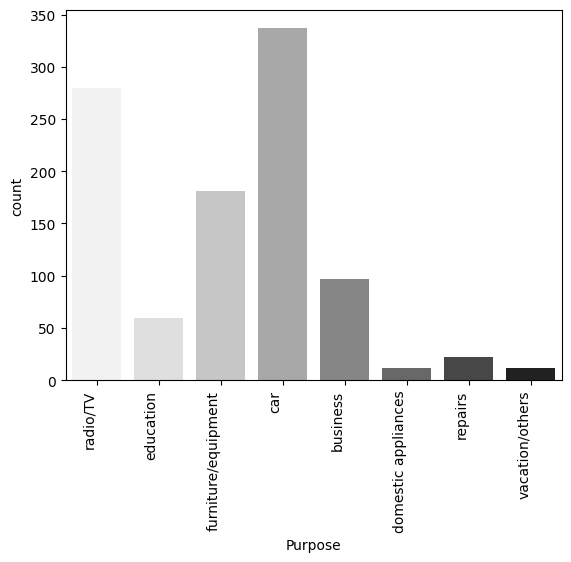

In [125]:
uni_categorical(df,"Purpose")

- RadioTV, Furniture/Equipment,Car are the most common reasons people request for credit
- People with the purpose of getting domestic appliances repars, vacation/others, request for credit the least

#### BIVARIATE ANALYSIS

In [126]:
# define functions for bivariate analysis
def bi_count(data, feature, target):
    sns.countplot(data=data,x=feature,hue=target,palette= "Greys")
    plt.xticks(rotation = 90, ha="right")
    plt.show()

def bi_bar(data,feature,target):
    sns.barplot(data= data,x= feature, y=target,palette="Greys")

def bi_scatter(data,feature,target):
    sns.scatterplot(data=data,x=feature,y=target)

def bi_line(data,feature,target):
    sns.lineplot(data=data,x=feature,y=target,errorbar= None)

In [127]:
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
152,24,male,skilled,own,little,rich,5848,36,0,radio/TV


C:\Users\USER\AppData\Local\Temp\ipykernel_12580\2250262895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


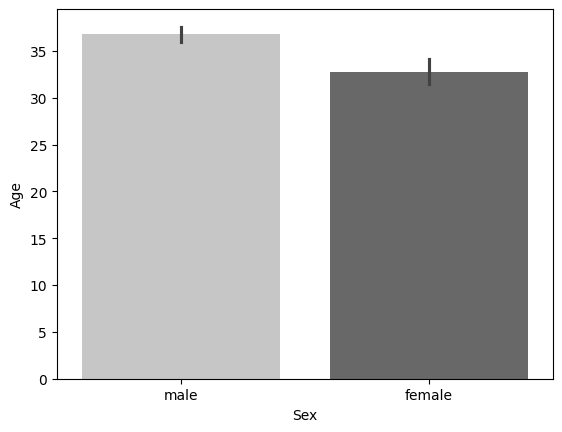

In [128]:
bi_bar(df,"Sex","Age")

In [129]:
df.groupby("Sex")["Age"].mean()

Sex
female    32.803226
male      36.778261
Name: Age, dtype: float64

-The average age of men that taakes credit is 37 while for women is 33 years

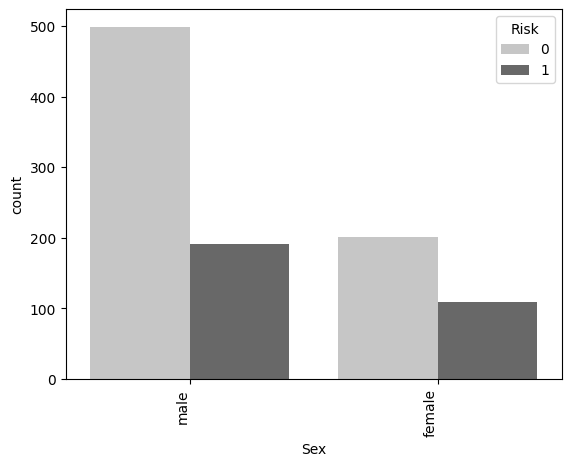

In [130]:
bi_count(df,"Sex","Risk")

- Across all categories, Most people that take credit are people considered not at risk of being defaulters
- More males that take credit are not at risk of being defaulters as compared to women

In [131]:
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
6,53,male,skilled,own,quite rich,moderate,2835,24,0,furniture/equipment


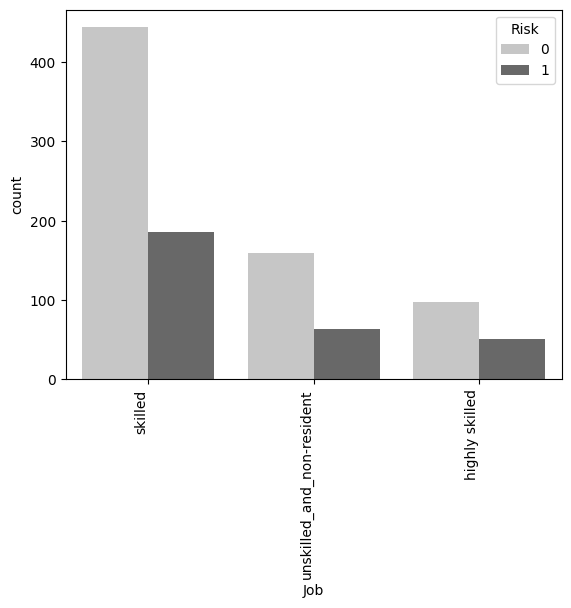

In [132]:
bi_count(df,"Job","Risk")

- Across all categories, people who take credit are people who are not at risk of being credit defaulters
- most of the people who are not at risk of being credit defaulters, are skilled people
- Highly skilled people are considered to be most at risj of being credit defaulters

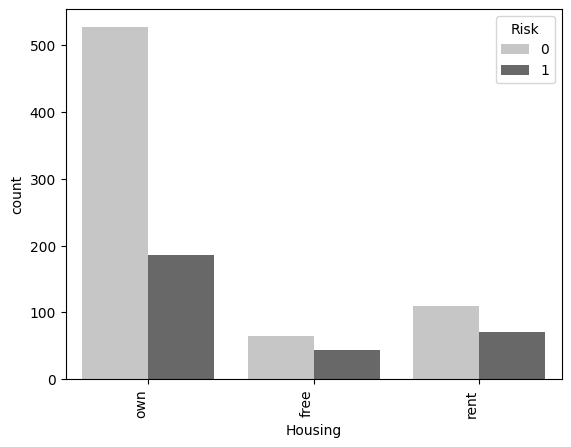

In [133]:
bi_count(df,"Housing","Risk")

- Across all categories, peoplw who are not at risk of being credit defaulters are more than the ones at risk
- people who are house owners are more likely to not be at rish of being credit defaulters
- people who stay in free housing are the most at rish in being credit defaulters

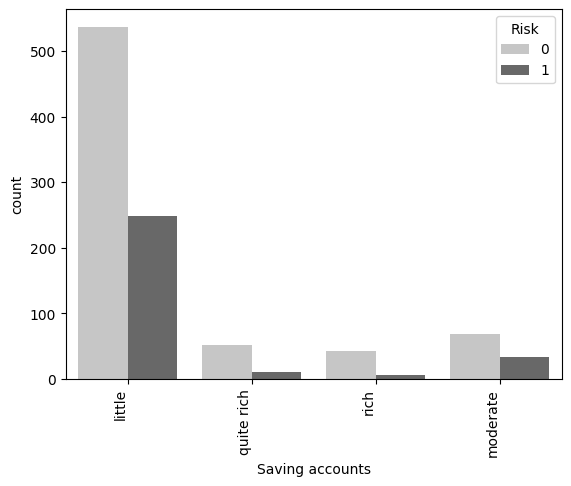

In [134]:
bi_count(df,"Saving accounts","Risk")

Across all categories, peoplw who are not at risk of being credit defaulters are more than the ones at risk


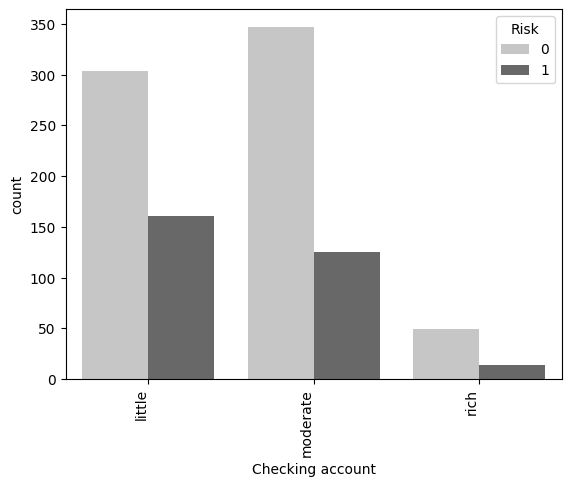

In [135]:
bi_count(df,"Checking account","Risk")

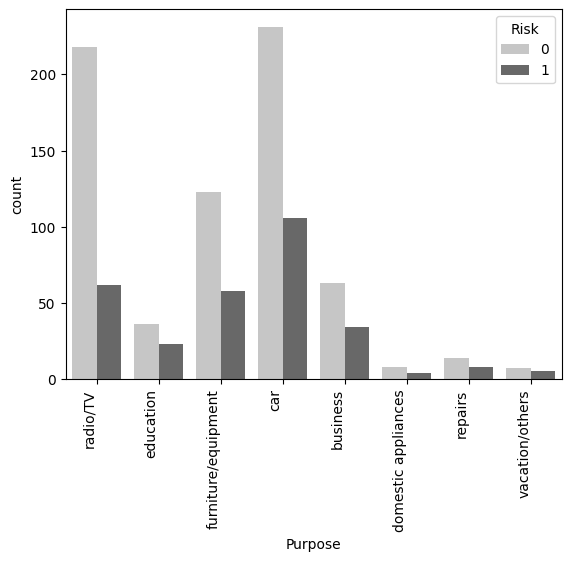

In [136]:
bi_count(df,"Purpose","Risk")

In [137]:
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
812,24,male,skilled,own,little,little,9629,36,1,car


C:\Users\USER\AppData\Local\Temp\ipykernel_12580\2250262895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


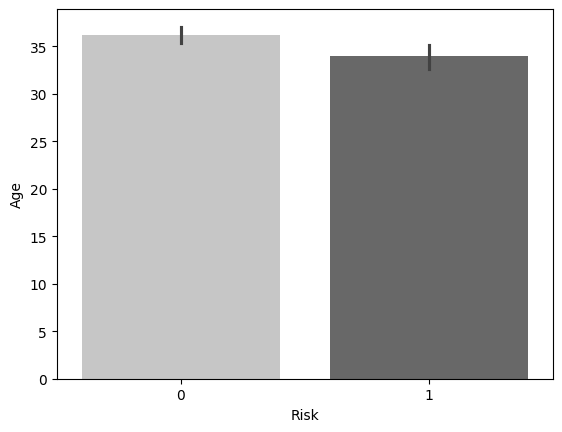

In [138]:
bi_bar(df,"Risk","Age")

C:\Users\USER\AppData\Local\Temp\ipykernel_12580\2250262895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


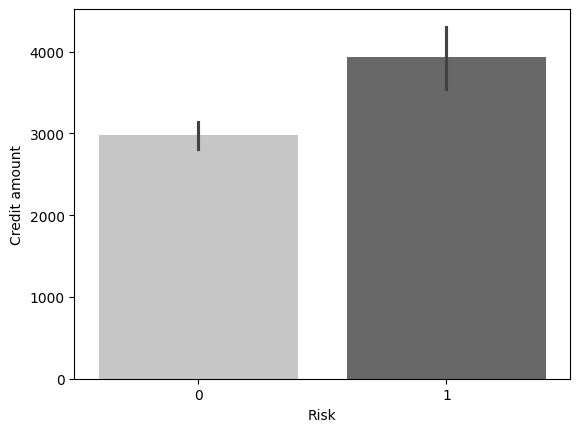

In [139]:
bi_bar(df,"Risk","Credit amount")

C:\Users\USER\AppData\Local\Temp\ipykernel_12580\2250262895.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


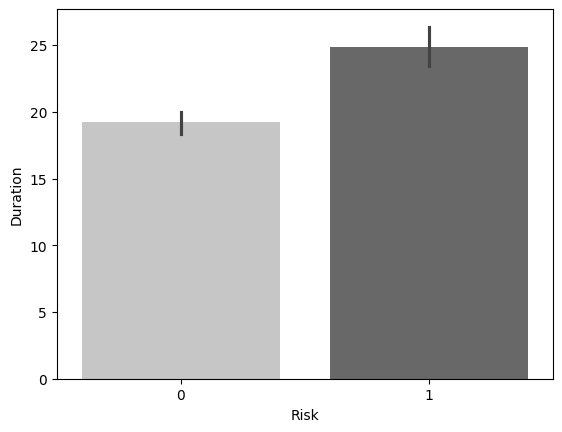

In [140]:
bi_bar(df,"Risk","Duration")

In [141]:
corr=df.corr(numeric_only = True)
corr

,Age,Credit amount,Duration,Risk
Age,1.000000,0.032716,-0.036136,-0.091127
Credit amount,0.032716,1.000000,0.624984,0.154739
Duration,-0.036136,0.624984,1.000000,0.214927
Risk,-0.091127,0.154739,0.214927,1.000000


<Axes: >

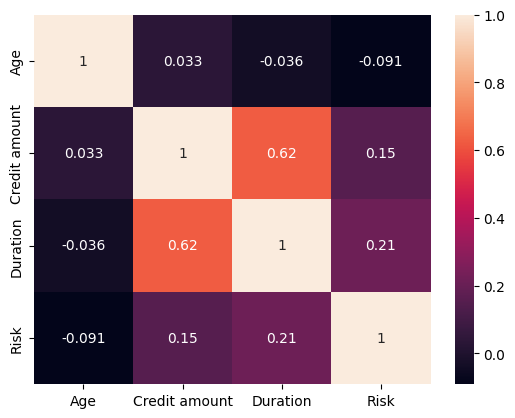

In [142]:
sns.heatmap(corr,annot=True)

## DATA PREPROCESSING

In [143]:
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
46,39,male,skilled,own,quite rich,moderate,2299,36,0,radio/TV


ENCODING

In [144]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("......................................")

Age
[67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
......................................
Sex
['male' 'female']
......................................
Job
['skilled' 'unskilled_and_non-resident' 'highly skilled']
......................................
Housing
['own' 'free' 'rent']
......................................
Saving accounts
['little' 'quite rich' 'rich' 'moderate']
......................................
Checking account
['little' 'moderate' 'rich']
......................................
Credit amount
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  

In [145]:
# using for loop for encoding ourselves
job_new = []

for i in df["Job"]:
    if i=="unskilled_and_non-resident":
        job_new.append(0)
    elif i=="skilled":
        job_new.append(1)
    else:
        job_new.append(2)

In [146]:
df["Job"]= job_new
df.sample()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
612,29,female,1,own,rich,little,3357,21,0,radio/TV


In [147]:
housing_new = []

for i in df["Housing"]:
    if i=="free":
        housing_new.append(0)
    elif i=="rent":
        housing_new.append(1)
    else:
        housing_new.append(2)
    

In [148]:
df["Housing"]=housing_new

In [149]:
Saving_new=[]

for i in df["Saving accounts"]:
    if i=="little":
        Saving_new.append(0)
    elif i=="quite rich":
        Saving_new.append(1)
    elif i=="rich":
        Saving_new.append(2)
    else:
        Saving_new.append(3)
        

In [150]:
df["Saving accounts"]= Saving_new

In [151]:
df.sample(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
956,49,male,0,2,0,rich,3656,30,0,radio/TV
853,32,male,0,0,0,little,1442,18,1,car
433,33,male,1,2,0,little,2058,24,0,repairs


In [152]:
# using label encoder because they can be ranked alphabetically
from sklearn.preprocessing import LabelEncoder

In [153]:
le=LabelEncoder()

In [154]:
col=["Sex","Checking account"]

for i in col:
    df[i]=le.fit_transform(df[i])

In [155]:
import joblib
joblib.dump(le,"le.joblib")# we are saving this for use on streamlit

['le.joblib']

In [156]:
df.sample(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
203,21,1,1,1,0,0,902,12,1,education
594,40,1,2,2,0,0,1358,24,1,vacation/others
174,26,1,1,2,0,0,3414,21,1,education


In [157]:
from sklearn.preprocessing import OneHotEncoder as ohe

In [158]:
oh=ohe(sparse_output = False, handle_unknown = "ignore",drop = "first")
encode = oh.fit_transform(df[["Purpose"]])
print(encode)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [159]:
joblib.dump(oh, "oh.joblib")

['oh.joblib']

In [160]:
# using Dummies because they cannot be ranked
df_p= pd.get_dummies(df["Purpose"],drop_first=1).astype(int)
df_p

,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0
996,1,0,0,0,0,0,0
997,0,0,0,0,1,0,0
998,0,0,0,0,1,0,0


In [161]:
#droop purpose column
df=df.drop("Purpose", axis = 1)

In [162]:
# concate dummies with main data
df1 = pd.concat([df,df_p],axis=1)

SCALING

In [163]:
mms_credit = MinMaxScaler()
df1["Credit amount"] = mms_credit.fit_transform(df[["Credit amount"]])

mms_credit.feature_names_in_
with open("mms_credit.pkl","wb") as f:
    pickle.dump(mms_credit,f)


In [164]:
mms_credit = MinMaxScaler()
df1["Age"] = mms_credit.fit_transform(df[["Age"]])

mms_credit.feature_names_in_
with open("mms_age.pkl","wb") as f:
    pickle.dump(mms_credit,f)


In [165]:


mms = MinMaxScaler()
cols = ["Age","Credit amount","Duration"]

for i in cols:
    df1[i]=mms.fit_transform(df1[[i]])
with open("mms.pkl","wb") as f:
    pickle.dump(mms,f)

In [166]:
mms = MinMaxScaler()
cols = ["Credit amount",]

for i in cols:
    df1[i]=mms.fit_transform(df1[[i]])
with open("mms_credit.pkl","wb") as f:
    pickle.dump(mms,f)

In [167]:
mms = MinMaxScaler()
cols = ["Age"]

for i in cols:
    df1[i]=mms.fit_transform(df1[[i]])
with open("mms_age.pkl","wb") as f:
    pickle.dump(mms,f)

In [168]:
#using pickle to save scaler, it doesnt follow thesame process as joblib
import pickle
with open("mms.pkl","wb") as f:
    pickle.dump(mms,f)

In [169]:
df1.sample(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
74,0.375000,1,2,2,0,0,0.095026,0.470588,1,0,0,1,0,0,0,0
817,0.089286,0,1,1,0,0,0.071751,0.029412,0,0,0,0,0,1,0,0
611,0.517857,0,0,0,3,2,0.054473,0.088235,1,1,0,0,0,0,0,0


In [171]:
df1.shape

(1000, 16)

## MODEL BUILDING

### MODEL EVALUATION CRITERION

Model can make wrong prediction as:
- FP= Model predicted a non defaulter as a defaulter
- FN= Model predicted a defaulter as a non defaulter

How to reduce this loss i.e need to reduce false negative?
- company would want to reduce the false negatives. we will use the recall metrics.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [85]:
# Split x and y
X=df1.drop("Risk", axis=1)
y= df1.Risk

In [86]:
# Split training and testing data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size = 0.2)

In [87]:
# train model
model= LogisticRegression()

In [88]:
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
# check for accuracy
model.score(X_test,y_test)

0.67

In [90]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score,classification_report,recall_score

In [91]:
# we introduced this so as to save the model for use on streamlit
import joblib
joblib.dump(model,"bank.joblib")# saving 

['bank.joblib']

In [92]:
y_pred = model.predict(X_test)

In [93]:
#Evaluation using confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[127,   7],
       [ 59,   7]])

In [94]:
y_test.value_counts()

Risk
0    134
1     66
Name: count, dtype: int64

<Axes: >

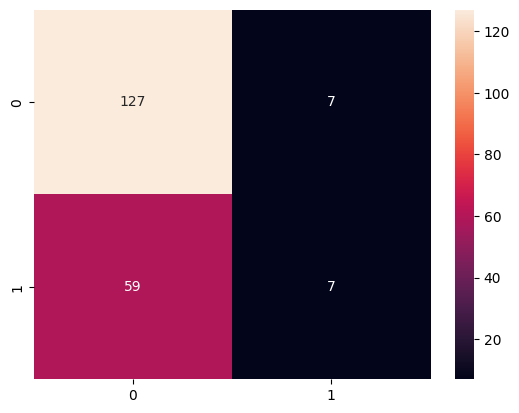

In [95]:
sns.heatmap(cm,annot=True,fmt="")

In [96]:
# you can use the formular to calc yourself
(133+12)/(133+12+50+5)

0.725

In [97]:
#prescision
precision_score(y_test,y_pred)

0.5

In [98]:
recall_score(y_test,y_pred)

0.10606060606060606

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79       134
           1       0.50      0.11      0.17        66

    accuracy                           0.67       200
   macro avg       0.59      0.53      0.48       200
weighted avg       0.62      0.67      0.59       200



- since we are focusing on recall and the recall score is poor, we should go back to feature preprocessing, feature engineering and finally do model tuning and this will lead us to SVM and for this, we will use an inbuild data
  

## INSIGHTS AND CONCLUSION

- Logistic Regression achieved an accuracy score indicating its usefulness.
- in predicting credit risk.
- The classification report shows precision and recall for both good and bad credit risk groups.
- This model can be extended with more advanced algorithms (e.g., Random Forest, XGBoost)
- for potential performance improvements.